In [109]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('mansi-nishant_predicting-insurance-premium-using-sklearn-python')
jovian.set_colab_id('1IWRPZKxYUrw59Ow3ZCer0jVVkkbqDf7m')

# ML - Project Predicting-insurance-premium-using-sklearn-python- By - Mansi Shah and Nishant

Use the "Run" button to execute the code.

In [110]:
!pip install jovian --upgrade --quiet

In [111]:
import jovian

In [112]:
# Execute this to save new versions of the notebook
jovian.commit(project="mansi-nishant-predicting-insurance-premium-using-sklearn-python")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nishant0363/mansi-nishant-predicting-insurance-premium-using-sklearn-python


'https://jovian.ai/nishant0363/mansi-nishant-predicting-insurance-premium-using-sklearn-python'

# Problem Statement
 ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

<img src="https://i.imgur.com/87Uw0aG.png" width="480">

Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

In [113]:
#Downloading the Data
!pip install pandas-profiling --quiet
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7fe781e8d990>)

In [114]:
#Creating Pandas DataFrame
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [115]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [117]:
!pip install jovian --quiet
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nishant0363/mansi-nishant-predicting-insurance-premium-using-sklearn-python


'https://jovian.ai/nishant0363/mansi-nishant-predicting-insurance-premium-using-sklearn-python'

## Exploratory Analysis and Visualization
Eexploring the data by visualizing the distribution of values in some columns of the dataset, and the relationships between other columns using libraries Matplotlib, Seaborn and Plotly for visualization.

In [118]:
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [120]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [121]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [122]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Charges

Visualizing the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [123]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.


In [124]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['red', 'grey'], 
                   title='Annual Medical Charges(Males/Females)')
fig.update_layout(bargap=0.1)
fig.show()

In [125]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['purple', 'grey'], 
                   title='Annual Medical Charges(Regions)')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker
Visualizing  the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [126]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [127]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

### Age and Charges

Visualizing the relationship between "age" and "charges" using a scatter plot. 

In [128]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges

Visualizing the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [129]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

### Correlation

From the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is expressed numerically using correlation coefficient.

In [130]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [131]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

Converting categorical columns to numeric columns to compute correlation.

In [132]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [133]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


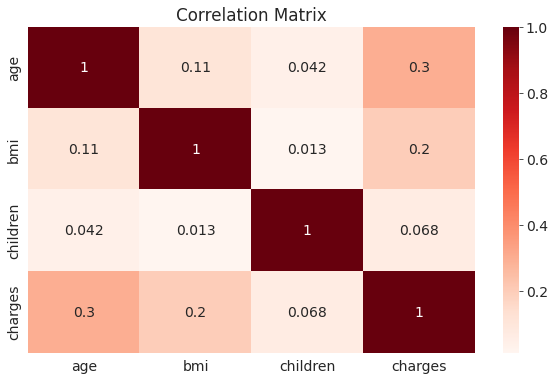

In [134]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [135]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nishant0363/mansi-nishant-predicting-insurance-premium-using-sklearn-python


'https://jovian.ai/nishant0363/mansi-nishant-predicting-insurance-premium-using-sklearn-python'

## Linear Regression using a Single Feature

The "smoker" and "age" columns have the strongest correlation with "charges". Finding a way of estimating the value of "charges" using the value of "age" for non-smokers. 

In [136]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

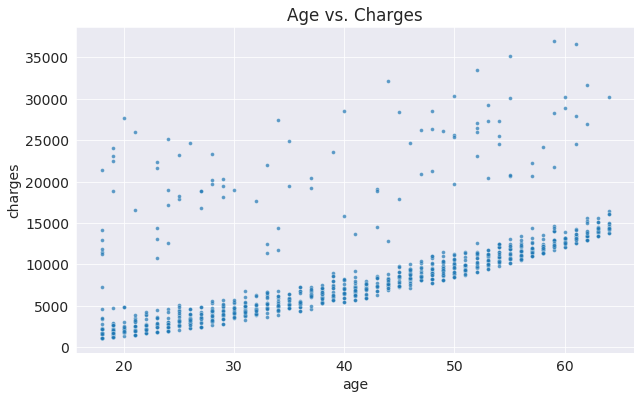

In [137]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try to find $w$ and $b$ for the line that best fits the data. 

* Using technique _linear regression_

* The numbers $w$ and $b$ are the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are the _inputs_ to the model and the values in the charges column are "targets". 


### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE).

In [138]:
!pip install numpy --quiet
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [139]:
def estimate_charges(age, w, b):
    return w * age + b

In [140]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


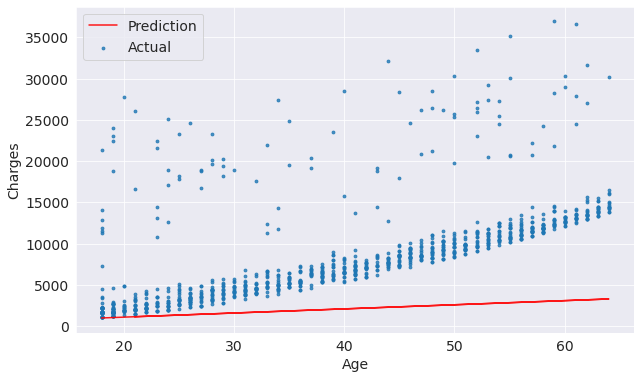

In [141]:
try_parameters(50, 100)

### Linear Regression using Scikit-learn

In [142]:
!pip install scikit-learn --quiet

In [143]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [144]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [145]:
model.fit(inputs, targets)

LinearRegression()

In [146]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [147]:
predictions = model.predict(inputs)

In [148]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [149]:
rmse(targets, predictions)

4662.505766636395

In [150]:
# w
model.coef_

array([267.24891283])

In [151]:
# b
model.intercept_

-2091.4205565650864

RMSE Loss:  4662.505766636395


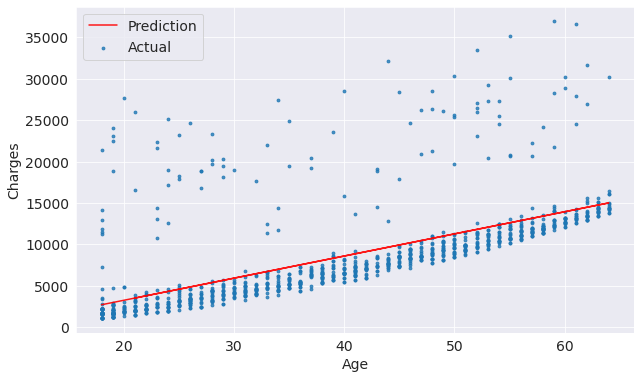

In [152]:
try_parameters(model.coef_, model.intercept_)

In [153]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nishant0363/mansi-nishant-predicting-insurance-premium-using-sklearn-python


'https://jovian.ai/nishant0363/mansi-nishant-predicting-insurance-premium-using-sklearn-python'